# Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle
import json

In [ ]:
df1 = pd.read_csv("/content/heart_disease_uci.csv")
df1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df1.shape

(920, 16)

In [ ]:
df1.num.sum()

916

In [ ]:
df1['target'] = df1['num']
df1.drop(['id','num','dataset'],axis=1,inplace=True)
df1.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object

In [ ]:
df1.shape

(920, 14)

In [ ]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df1.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [ ]:
df1.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object

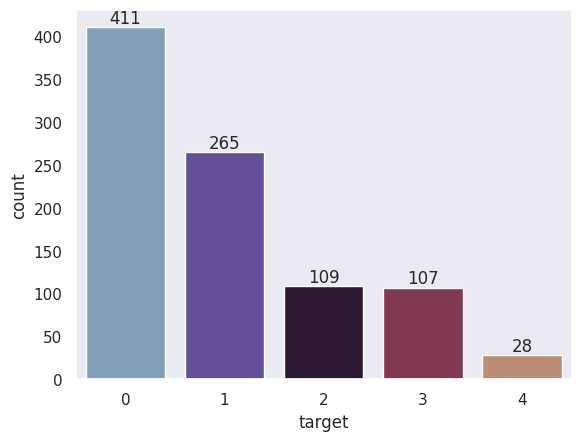

In [ ]:
ax = sns.countplot(data=df1, x = 'target', label='Count',palette='twilight')
for label in ax.containers:
    ax.bar_label(label)

In [ ]:
df1.drop_duplicates(subset =df1.columns[:-1], keep = 'first', inplace = True)
df1.shape

(918, 14)

# Preprocessing

In [ ]:
print('Unique Values - ')
print('SEX:',df1.sex.unique())
print('CP:',df1.cp.unique())
print('FBS:',df1.fbs.unique())
print('RESTECG:',df1.restecg.unique())
print('EXANG:',df1.exang.unique())
print('SLOPE:',df1.slope.unique())
print('CA:',df1.ca.unique())
print('THAL:',df1.thal.unique())
print('TARGET:',df1.target.unique())

Unique Values - 
SEX: ['Male' 'Female']
CP: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
FBS: [True False nan]
RESTECG: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
EXANG: [False True nan]
SLOPE: ['downsloping' 'flat' 'upsloping' nan]
CA: [ 0.  3.  2.  1. nan]
THAL: ['fixed defect' 'normal' 'reversable defect' nan]
TARGET: [0 2 1 3 4]


In [ ]:
df1['sex'] = df1.sex.map({'Female':0, 'Male':1})
df1['cp'] = df1.cp.map({'typical angina':0,'atypical angina':1,'non-anginal':2,'asymptomatic':3})
df1['fbs'] = df1.fbs.map({True:1, False:0})
df1['restecg'] = df1.restecg.map({'normal':0, 'st-t abnormality':1,'lv hypertrophy':2})
df1['exang'] = df1.exang.map({True:1,False:0})
df1['slope'] = df1.slope.map({'upsloping':0,'flat':1,'downsloping':2})
df1['thal'] = df1.thal.map({'normal':0,'fixed defect':1,'reversible defect':2})
df1['target'] = df1.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [ ]:
df1.shape

(918, 14)

In [ ]:
df1.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalch      float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
df1.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         29
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       307
ca          609
thal        676
target        0
dtype: int64

In [ ]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,918.000000,918.000000,918.000000,859.000000,889.000000,828.000000,916.000000,863.000000,863.000000,856.000000,611.000000,309.000000,242.000000,918.000000
mean,53.510893,0.789760,2.251634,132.137369,199.107987,0.166667,0.604803,137.542294,0.389340,0.880841,0.770867,0.676375,0.190083,0.553377
std,9.432617,0.407701,0.931031,19.063560,110.841162,0.372903,0.806354,25.936524,0.487883,1.091673,0.619256,0.935653,0.393179,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000,0.000000,0.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,1.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,1.000000,1.000000


In [ ]:
df1[['trestbps','chol','thalch','oldpeak','ca','restecg','exang','slope','fbs','thal']
    ] = df1[['trestbps','chol','thalch','oldpeak',
        'ca','restecg','exang','slope','fbs','thal']].apply(lambda x: x.fillna(x.median()))
df1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
657,56,1,3,120.0,0.0,0.0,1.0,148.0,0.0,0.0,1.0,0.0,0.0,1
194,68,0,2,120.0,211.0,0.0,2.0,115.0,0.0,1.5,1.0,0.0,0.0,0
163,58,0,3,100.0,248.0,0.0,2.0,122.0,0.0,1.0,1.0,0.0,0.0,0
168,35,1,3,126.0,282.0,0.0,2.0,156.0,1.0,0.0,0.0,0.0,0.0,1
154,64,1,3,120.0,246.0,0.0,2.0,96.0,1.0,2.2,2.0,1.0,0.0,1


In [ ]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df1.shape

(918, 14)

# Visualizing the data

In [ ]:
df2 = df1.copy()

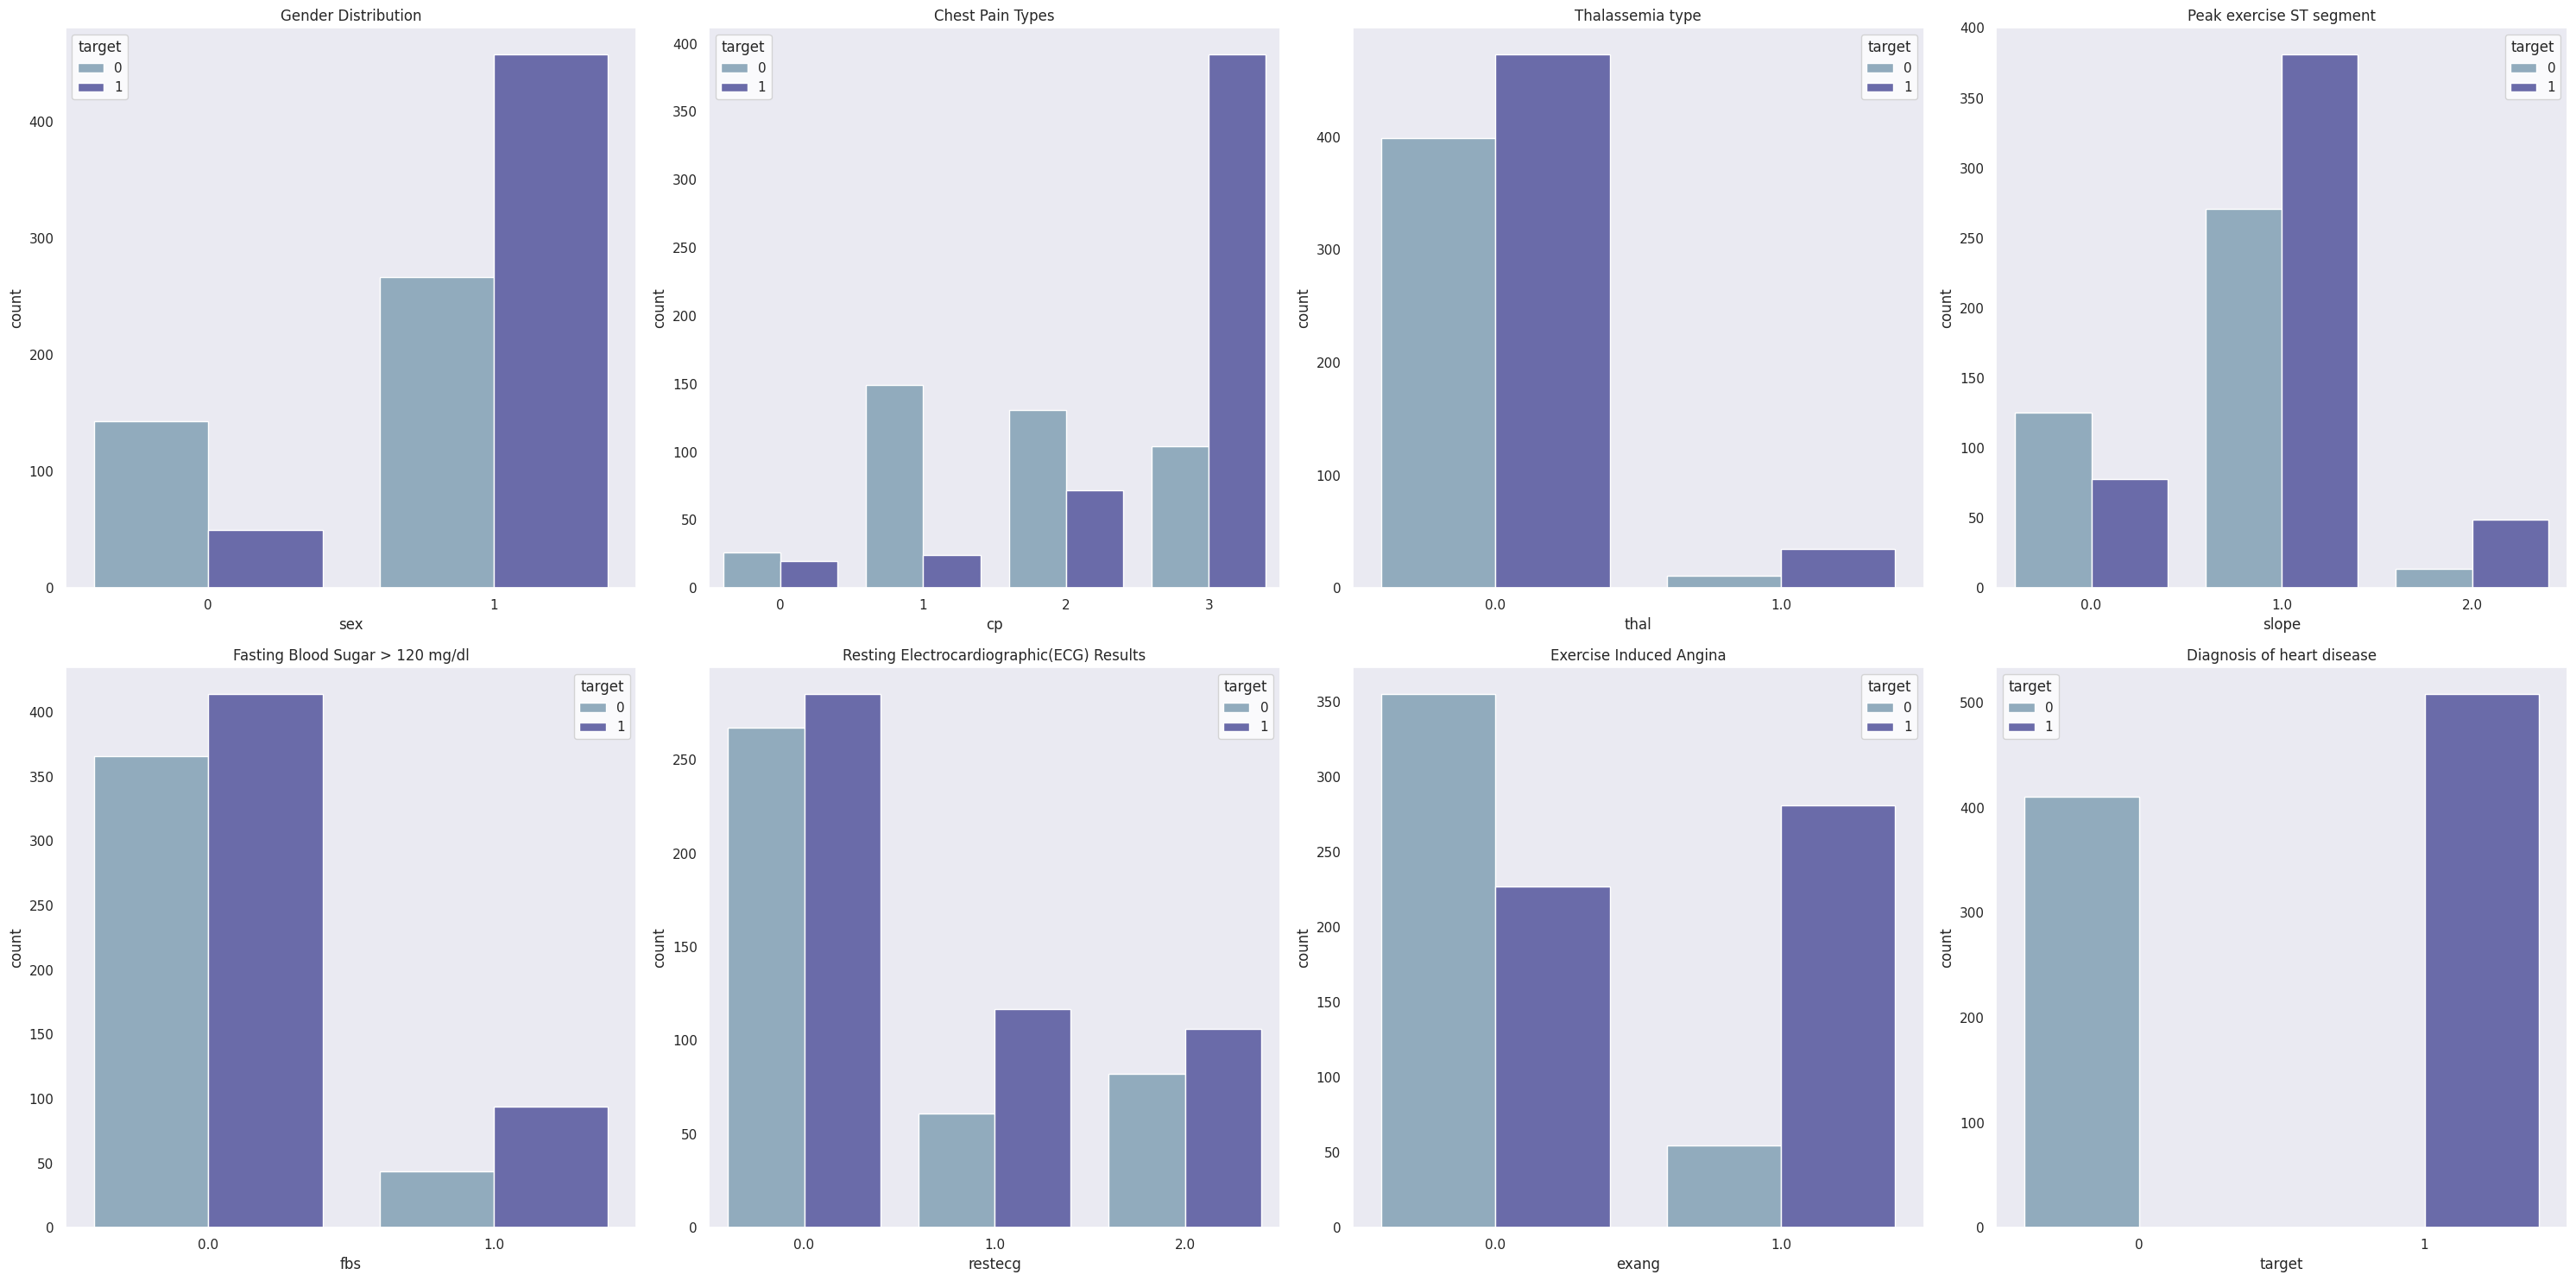

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(30,15))
sns.set_theme(style="whitegrid")
sns.set_palette("twilight")
sns.countplot(x='sex', data=df2,hue='target', ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=df2,hue='target', ax=axes[0,1])
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='thal', data=df2,hue='target', ax=axes[0,2],)
axes[0,2].set_title('Thalassemia type')

sns.countplot(x='slope', data=df2,hue='target', ax=axes[0,3])
axes[0,3].set_title('Peak exercise ST segment')

sns.countplot(x='fbs', data=df2,hue='target', ax=axes[1,0])
axes[1,0].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=df2,hue='target', ax=axes[1,1])
axes[1,1].set_title('Resting Electrocardiographic(ECG) Results')

sns.countplot(x='exang', data=df2,hue='target', ax=axes[1,2])
axes[1,2].set_title('Exercise Induced Angina')

# 0 -No disease, 1 - yes
sns.countplot(x='target', data=df2,hue='target', ax=axes[1,3])
axes[1,3].set_title('Diagnosis of heart disease')

plt.tight_layout()
plt.show()

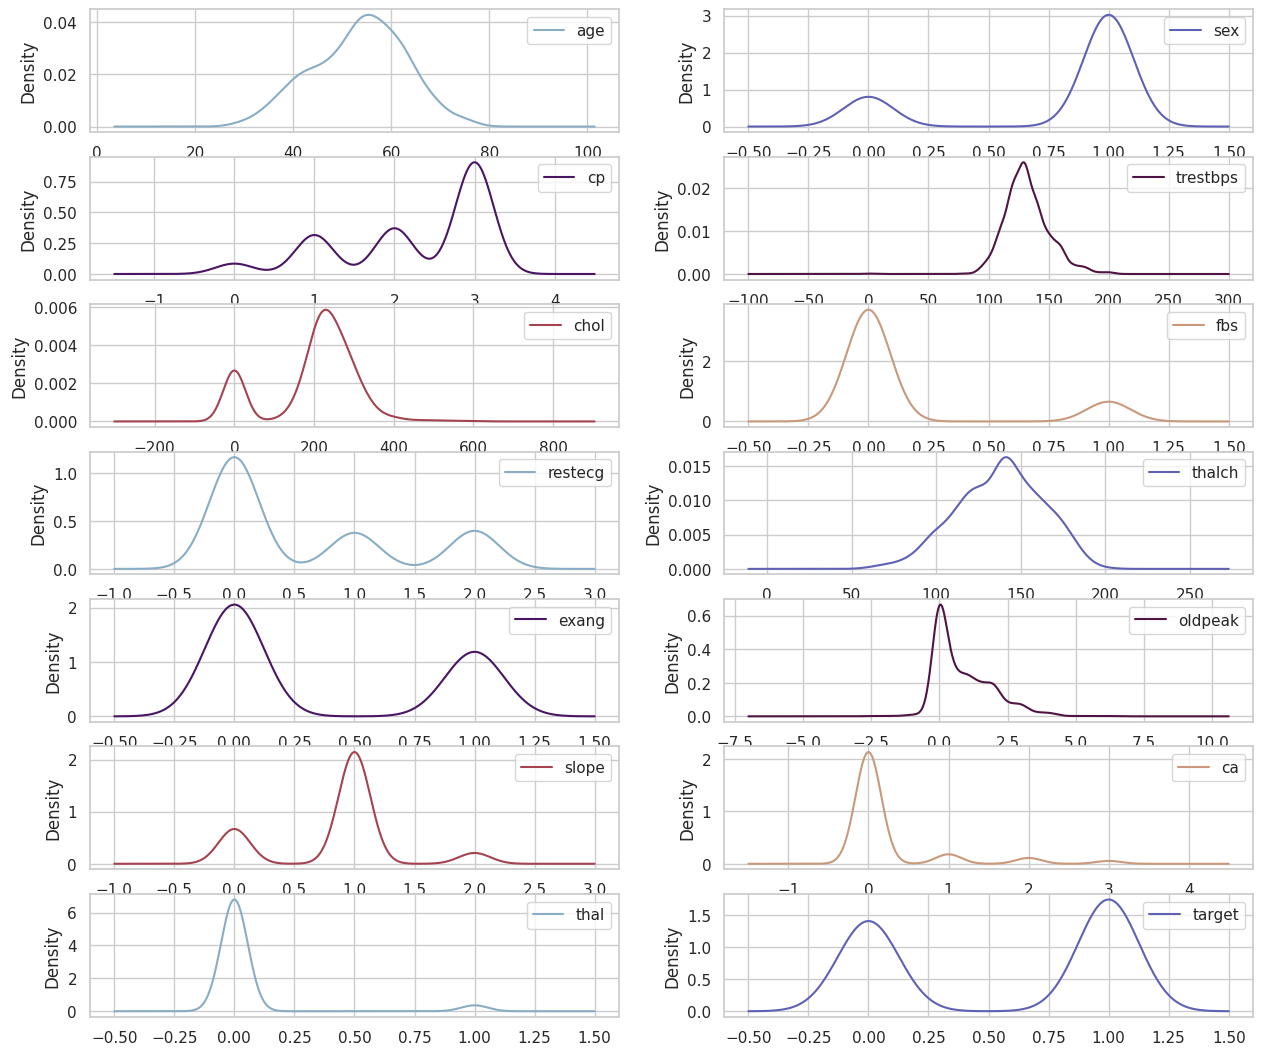

In [ ]:
df2.plot(kind='density', subplots=True, layout=(8,2), sharex=False , figsize =(15,15))
plt.show()

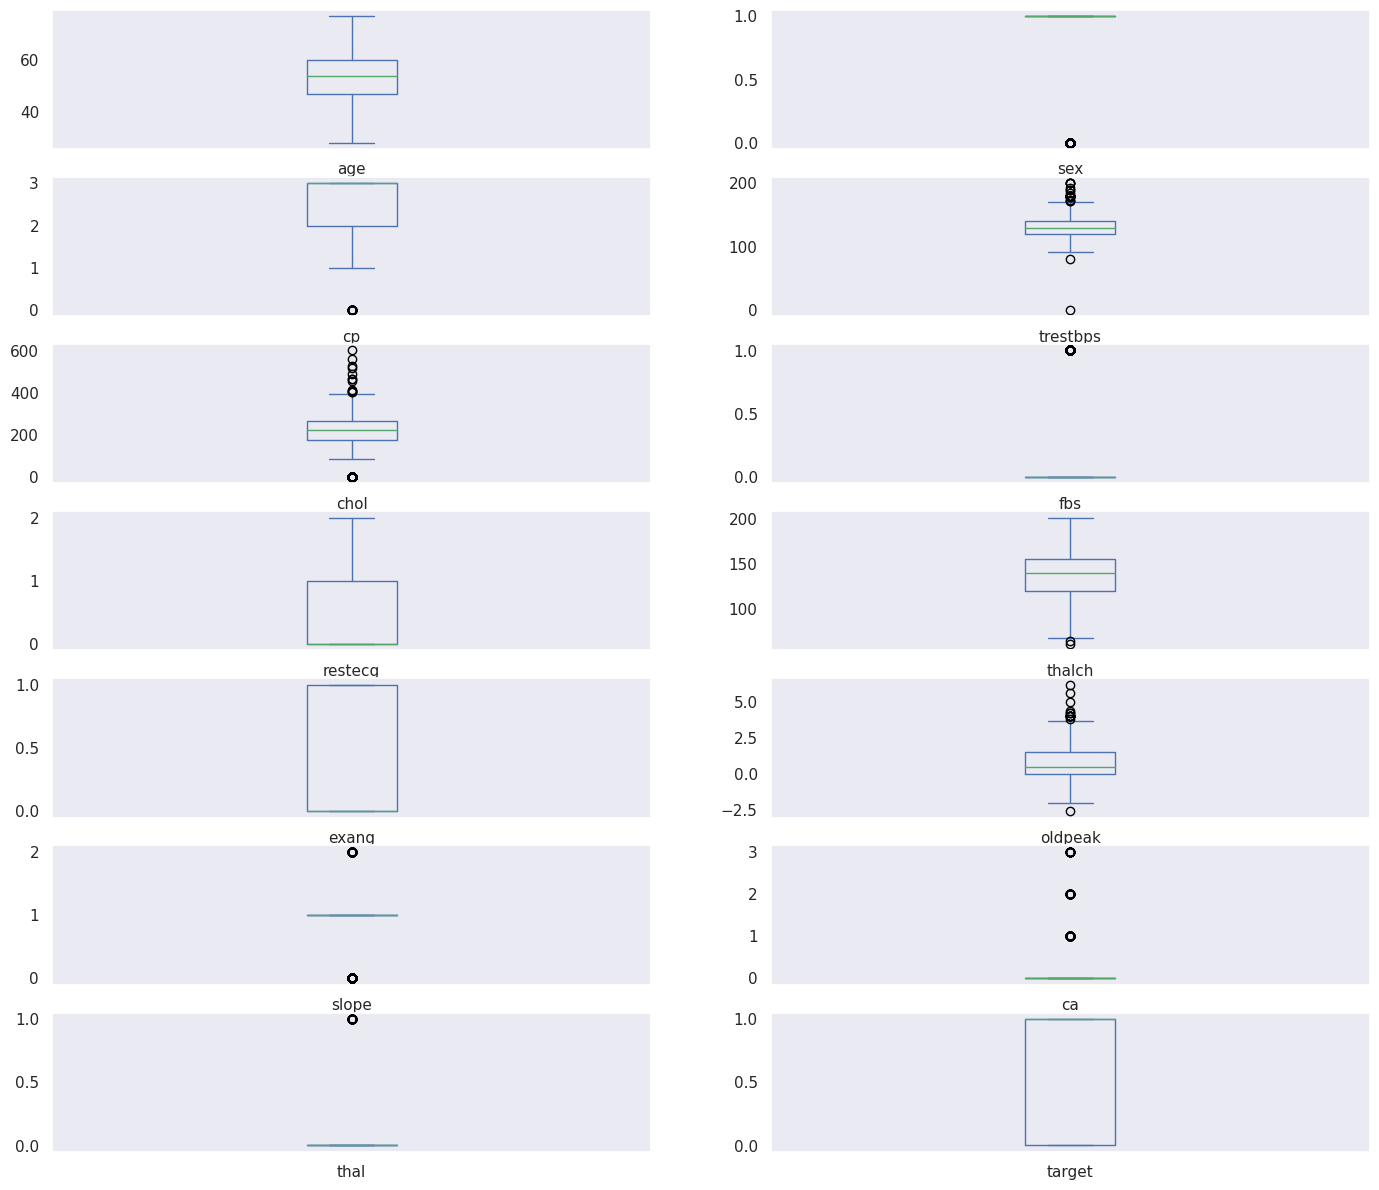

In [ ]:
sns.set_theme(style="dark")
df2.plot(kind='box', subplots=True, layout=(8,2),sharex=False,sharey=False,figsize =(17,17))
plt.show()

In [ ]:
correlation = df2.corr()
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.471354
exang       0.432424
oldpeak     0.366618
sex         0.305445
age         0.282039
slope       0.205742
ca          0.164878
fbs         0.108114
trestbps    0.099115
thal        0.095861
restecg     0.061011
chol       -0.229155
thalch     -0.380738
Name: target, dtype: float64

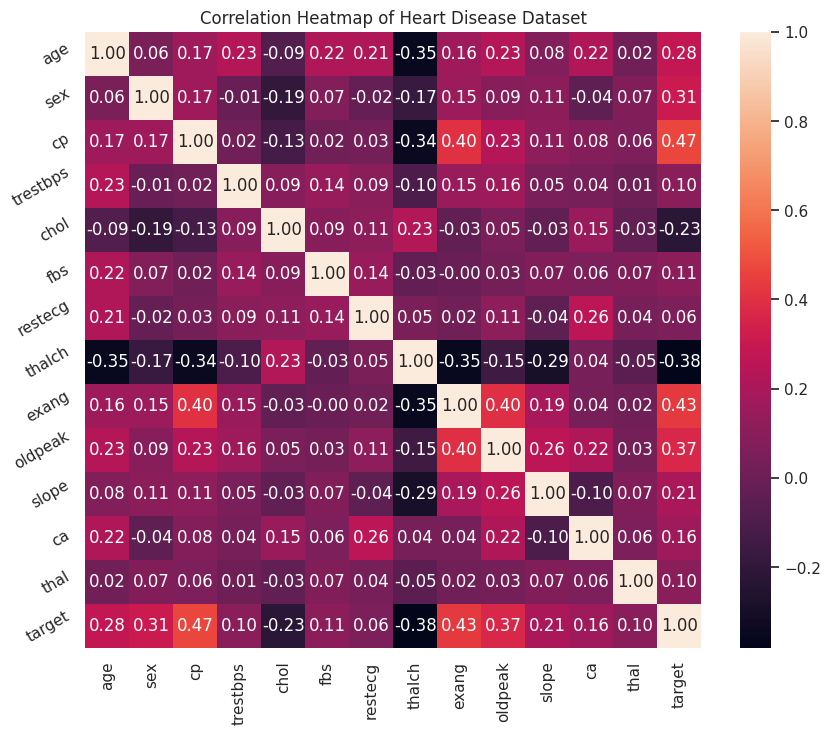

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# Training the model

In [ ]:
X = df2.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,2.0,0.0,1.0
1,67,1,3,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,3.0,0.0
2,67,1,3,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,2.0,0.0
3,37,1,2,130.0,250.0,0.0,0.0,187.0,0.0,3.5,2.0,0.0,0.0
4,41,0,1,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0.0


In [ ]:
y = df2.target
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (688, 13)
y_train:  (688,)
X_test:  (230, 13)
y_test:  (230,)


Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_rf = rfc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_rf)*100)

Accuracy:  78.26086956521739


Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_nb = gnb.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_nb)*100)

Accuracy:  83.47826086956522


Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train,y_train)
y_lr = log_reg.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_lr)*100)

Accuracy:  80.43478260869566


Support Vector Machines(SVM)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_svm)*100)

Accuracy:  80.43478260869566


# Comparison of different ML models

In [ ]:
models = [
    LogisticRegression(solver = 'liblinear'),
    RandomForestClassifier(n_estimators=10),
    SVC(kernel='linear'),
    GaussianNB()
    ]

In [ ]:
models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for alg in models:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    models_compare.loc[row_index,'MLA used'] = MLA_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train)*100, 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test)*100, 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    models_compare.loc[row_index, 'F1_score'] = f1_score(y_test, predicted)

    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
models_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,F1_score
3,GaussianNB,80.81395,83.47826,0.882812,0.830882,0.856061
0,LogisticRegression,82.26744,80.43478,0.847328,0.816176,0.831461
2,SVC,82.12209,80.43478,0.837037,0.830882,0.833948
1,RandomForestClassifier,98.25581,77.82609,0.845528,0.764706,0.803089


                       Classification Report 
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        94
           1       0.88      0.83      0.86       136

    accuracy                           0.83       230
   macro avg       0.83      0.84      0.83       230
weighted avg       0.84      0.83      0.84       230



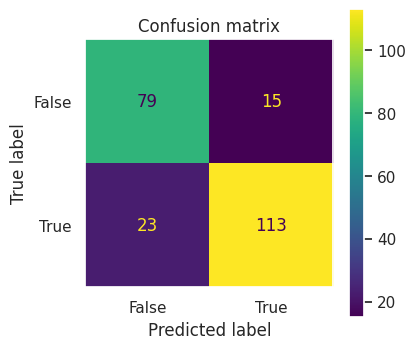

In [ ]:
print('                       Classification Report ')
print(classification_report(y_test, y_nb))
confusion_matrix = metrics.confusion_matrix(y_test, y_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Confusion matrix')
cm_display.plot(ax=ax)
plt.show()

**The best model is Gaussian Naive Bayes with accuracy of 83%**

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Pickle file


In [ ]:
with open('heart_disease.pickle','wb') as f:
    pickle.dump(gnb,f)

In [ ]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("heart_columns.json","w") as f:
    f.write(json.dumps(columns))

# New Section

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

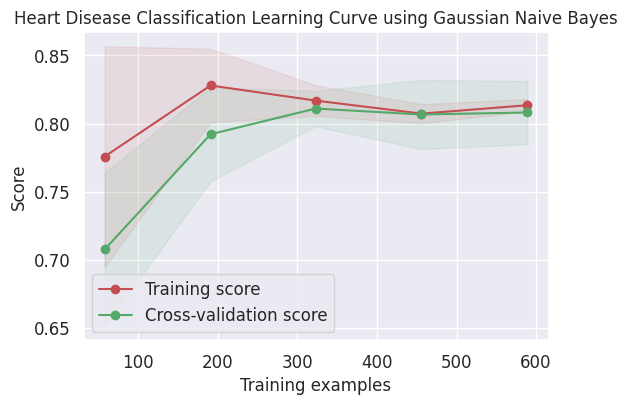

In [ ]:
skplt.estimators.plot_learning_curve(GaussianNB(), X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="medium", text_fontsize="medium",
                                     title="Heart Disease Classification Learning Curve using Gaussian Naive Bayes");

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

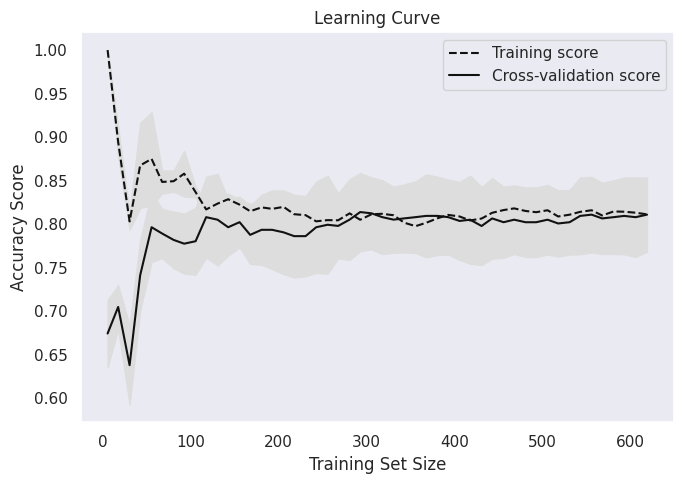

In [ ]:
plt.subplots(1, figsize=(7,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()